# PREPROCESSING AND CLEANING OF UNKNOWN DATASET 
https://grid.cs.gsu.edu/~rangryk/courses/csc4780/PDF/dataPreP.csv

In [1]:
import pandas as pd
filename = 'dataPreP.csv'
df = pd.read_csv(filename, sep=',')
quantitative = df._get_numeric_data()
print(quantitative.columns.tolist())
print(quantitative.describe())
Other = df.select_dtypes(include='object')
print(Other.columns.tolist())
print(other.describe())
export_csv = quantitative.to_csv (r'Quantitative.csv', index = None, header=True)
export_csv = Other.to_csv (r'Others.csv', index = None, header=True)

['Attr 4', 'Attr 5', 'Attr 6', 'Attr 7', 'Attr 8', 'Attr 9', 'Attr 10', 'Attr 11', 'Attr 12']
['Attr 0', 'Attr 1', 'Attr 2', 'Attr 3', 'Labels']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from pandas.plotting import scatter_matrix
open('Quantitative.csv')
qt = pd.read_csv('Quantitative.csv')

#find the cardinality and missing percentage
Card = qt.apply(pd.Series.nunique)
Miss = qt.isna().mean().round(4) * 100
#print total non-zeroes in each column to ensure miss values
print(qt.astype(bool).sum(axis=0))

#Building the Data qualitty report with format and names similar in Text Book
description= qt.describe()
tsk2 = description.transpose()
tsk2['Card'] = Card
tsk2['% Miss'] = Miss
new_df = tsk2[['count', '% Miss', 'Card', 'min','25%','mean','50%','75%','max','std']]
new_df.rename(columns={'25%':'1stQrt',
                          '50%':'Median',
                          '75%':'3rdQrt',
                          'std':'Std Dev'}, 
                 inplace=True)
print(new_df)
#frame = new_df.get_figure()
#frame.savefig('Quality table.png')
#To save to local machine
#np.savetxt(r'check.txt')
#plot Histograms and Violin Plots
#for i, col in enumerate(qt.columns):
#    plt.figure(i)
#    sbn.distplot(qt[col],20)
#    ax = sbn.distplot(qt[col],20)
#    fig = ax.get_figure()
#    fig.savefig(str(i)+''+'histogram.png')

##for j, col in enumerate(qt.columns):
   #plt.figure(j+12)
  # sbn.violinplot(qt[col])
   #ax = sbn.violinplot(qt[col])
   #fig = ax.get_figure()
   #fig.savefig(str(j)+''+'violin.png')
#SPLOMS
scatter_matrix(qt, alpha=0.2, figsize = (8,8), diagonal = 'hist')
#plt.savefig(r"SPLOM.png")

#correlation and covariance matrix
corr=qt.corr()
cov = qt.cov()
print(corr)
print(cov)
#Heat map
fig = plt.figure() 
ax1 = fig.add_subplot(2, 1, 1) # row, column, position
ax2 = fig.add_subplot(2, 1, 2)
sbn.heatmap(corr,ax=ax1)
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})
sbn.heatmap(cov.astype(float),ax=ax2)
cov.style.background_gradient(cmap='YlGnBu').set_properties(**{'font-size': '0pt'})
plt.savefig(r"Cov.png")

with pd.ExcelWriter('continuous_Summary_report.xlsx') as writer:
    new_df.to_excel(writer)
    corr.to_excel(writer, sheet_name='Sheet1', startrow = 13 )     
    cov.to_excel(writer, sheet_name='Sheet1', startrow = 26 )


Attr 4     1000
Attr 5     1000
Attr 6     1000
Attr 7     1000
Attr 8     1000
Attr 9     1000
Attr 10    1000
Attr 11    1000
Attr 12    1000
dtype: int64
          count  % Miss  Card          min      1stQrt       mean     Median  \
Attr 4   1000.0     0.0  1000    -3.256679   -1.827079  -0.429506  -0.266172   
Attr 5   1000.0     0.0  1000    -2.560023    2.249369   4.096724   5.022662   
Attr 6   1000.0     0.0  1000    -0.509973    1.319508   3.687289   2.462706   
Attr 7   1000.0     0.0  1000    -2.612437   -0.703916   0.022742   0.069515   
Attr 8   1000.0     0.0  1000    -0.892724   -0.575071   0.050446   0.044942   
Attr 9   1000.0     0.0  1000    -0.892724   -0.575071   0.050446   0.044942   
Attr 10  1000.0     0.0  1000    -0.892724   -0.575071   0.050446   0.044942   
Attr 11  1000.0     0.0  1000    -0.892724   -0.575071   0.050446   0.044942   
Attr 12  1000.0     0.0  1000 -1631.283364 -337.681402  15.681429  32.891367   

             3rdQrt          max     Std D

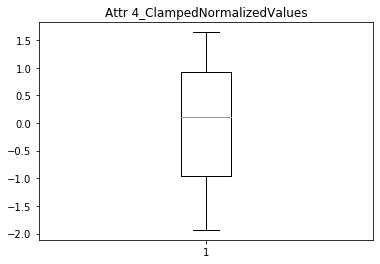

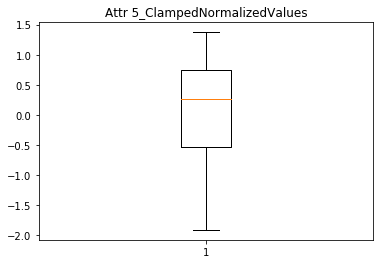

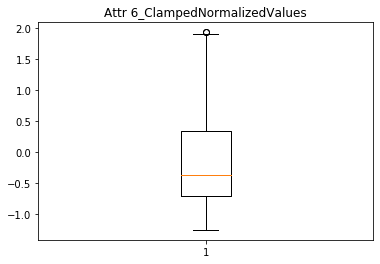

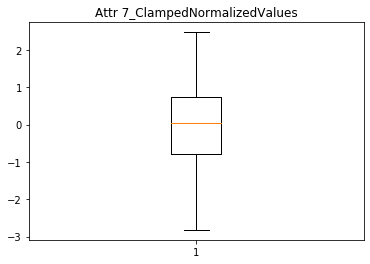

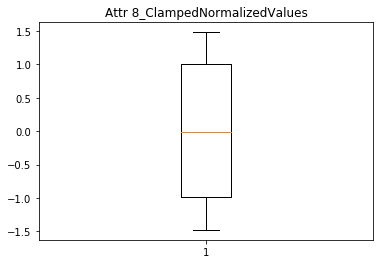

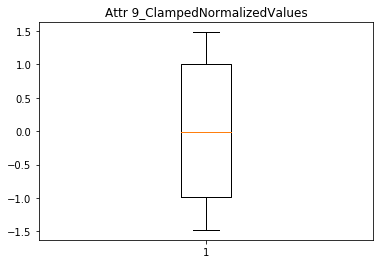

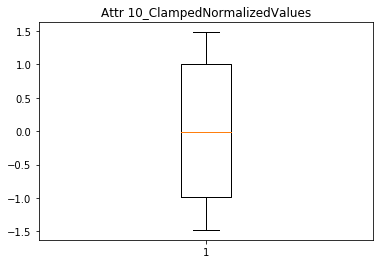

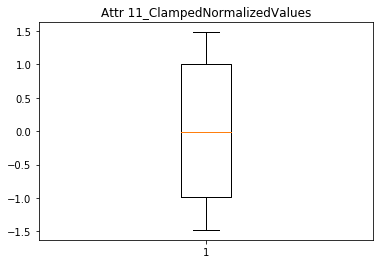

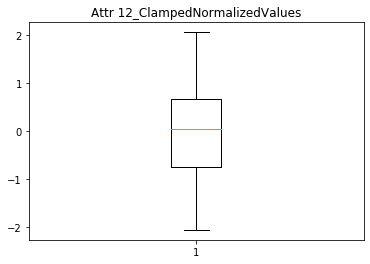

C:\Users\shoeb habeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


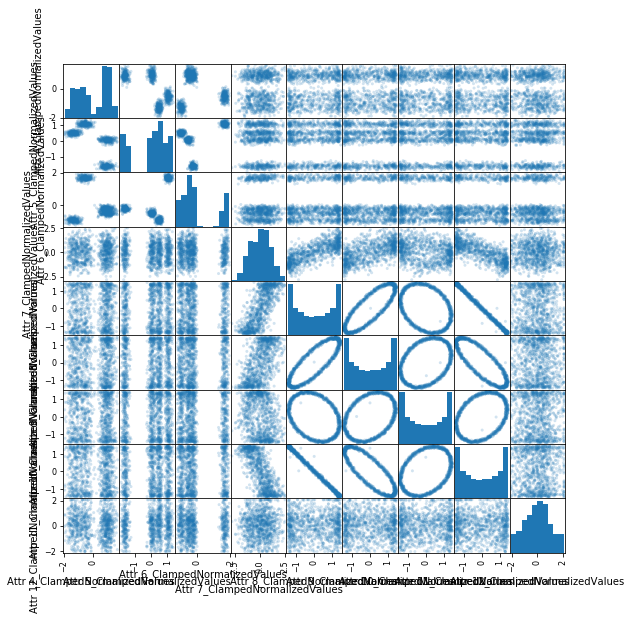

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from pandas.plotting import scatter_matrix

open("Quantitative.csv")
df_Num=pd.read_csv("Quantitative.csv")
df_out=pd.DataFrame()
df_repo=df_Num.describe()
df_inv=df_repo.transpose()

##Method to find outliers

df_insert = pd.DataFrame()
df_inv['IQR']=df_inv['75%']-df_inv['25%']

##adding different outlier exclusively for Attr 12
Attr12 = df_repo['Attr 12']
l = Attr12['mean'] - 2*Attr12['std']
u = Attr12['mean'] + 2*Attr12['std']
df_insert['Lower']= [l]
df_insert['Upper']= [u]
df_insert.rename(index={0:'Attr 12'}, inplace=True)

df_clamp=pd.DataFrame()
df_clamp['Lower']=df_inv['25%']-1.5*df_inv['IQR'] 
df_clamp['Upper']=df_inv['75%']+1.5*df_inv['IQR']
df_clamp = df_clamp.drop('Attr 12')
df_clamp = df_clamp.append(df_insert)

attr='_ClampedValues'

for name,series in df_Num.iteritems():
    df_Num[name+''+attr]=df_Num[name]
    for i in df_Num[name].index.values:
        if df_Num.loc[i,name] < df_clamp.loc[name,'Lower']:
            df_Num.loc[i,name+''+attr]=df_clamp.loc[name,'Lower']
        elif df_Num.loc[i,name]>df_clamp.loc[name,'Upper']:
            df_Num.loc[i,name+''+attr]=df_clamp.loc[name,'Upper']
        else:
            df_Num.loc[i,name]=df_Num.loc[i,name]

df_qv=pd.DataFrame()
df_qv=df_Num.iloc[:,9:18]

##Normalising the clamped values and Z score

df_nor=pd.DataFrame()
attr1="_ClampedNormalizedValues"
for name,series in df_qv.iteritems():
    k=name.split('_')[0]
    df_nor[k+''+attr1]=df_qv[name].copy()

df_nor=df_nor.apply(zscore)
excelzscore = pd.DataFrame()
excelzscore['max'] = df_nor.max()
excelzscore['min'] = df_nor.min()

#Box plots
for (name,series) in df_nor.iteritems():
        plt.boxplot(df_nor[name])
        plt.title(name)
        plt.show()
        
#SPLOM        
scatter_matrix(df_nor, alpha=0.2, figsize = (9,9), diagonal = 'hist')
plt.savefig(r"SPLOM_clamped.png")

#Making a file to transfer

for name,series in df_qv.iteritems():
    k=name.split('_')[0]
    df_qv[k+''+attr1]=df_nor[k+''+attr1]

#rename the columns as per question requirements
df_final=pd.DataFrame()
df_final=df_qv[['Attr 4_ClampedValues','Attr 4_ClampedNormalizedValues','Attr 5_ClampedValues','Attr 5_ClampedNormalizedValues','Attr 6_ClampedValues','Attr 6_ClampedNormalizedValues','Attr 7_ClampedValues','Attr 7_ClampedNormalizedValues','Attr 8_ClampedValues','Attr 8_ClampedNormalizedValues','Attr 9_ClampedValues','Attr 9_ClampedNormalizedValues','Attr 10_ClampedValues','Attr 10_ClampedNormalizedValues','Attr 11_ClampedValues','Attr 11_ClampedNormalizedValues','Attr 12_ClampedValues','Attr 12_ClampedNormalizedValues']]

df_final.to_csv("QTransferred.csv",index=False)

#local copies for data
with pd.ExcelWriter('continuous_Summary_report.xlsx') as writer:
    df_clamp.to_excel(writer, sheet_name='Sheet2')
    excelzscore.to_excel(writer, sheet_name ='Sheet2', startrow= 12)


In [ ]:
Working on the Qualitative part of the file now by understanding the behaviour through statistacal tool(MODE)

C:\Users\shoeb habeeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


       count Card     Mode Mode_F Mode%                 Mode2  Mode2_F Mode2%
Attr 0  1000    8   Warsaw    495  49.5              New York    238.0   23.8
Attr 1  1000   12      Red    417  41.7                 Green    236.0   23.6
Attr 2  1000   12   Purple    102  10.2                  Lime     93.0    9.3
Attr 3  1000   12  Private    103  10.3  Private Second Class    102.0   10.2
Labels  1000    3        X    340    34                     Y    338.0   33.8


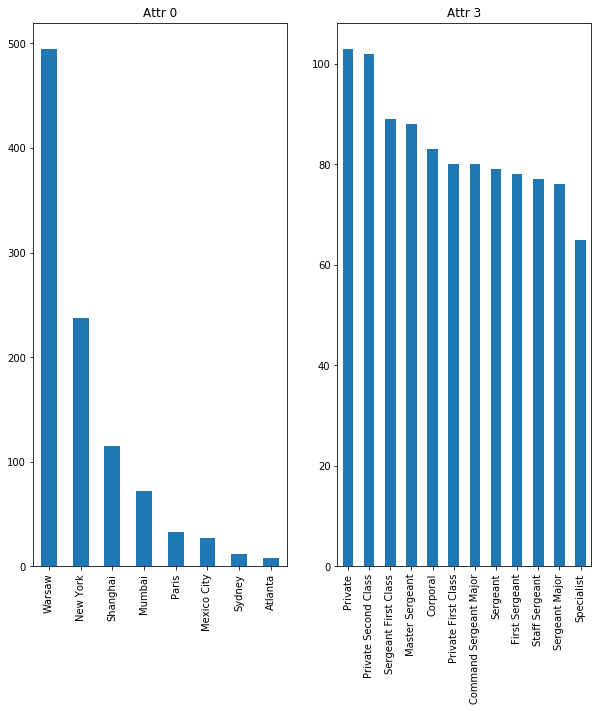

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Others.csv")
df_new=df.astype('category')
df_trans=df_new.describe().transpose()
df_trans['Mode%'] = df_trans['freq']/df_trans['count']*100

#Check if there are null values
    
for (name,series) in df_new.iteritems():
    s = pd.Series(df_new[name], dtype="category")
    bool_series=pd.isnull(s)

#calculate 2nd Mode
count=pd.DataFrame()
df_val=pd.DataFrame()
for (name,series) in df_new.iteritems():
    count = df_new[name].value_counts().nlargest(n=2).iloc[[1]]
    df_val=df_val.append(count)

#Export 2nd mode to a csv
df_val.sum().to_csv('mode.csv',header=False)
#Read these back to create a fresh Dataframe
df_re=pd.read_csv('mode.csv',names=['Mode2','Mode2_F'])
#Join 2nd mode dataframe to original dataframe
df_re_n=df_re.rename(index={0:"Attr 0",1:"Attr 1",2:"Attr 2",3:"Attr 3",4:"Labels"})

#creating bar plot
categorical_features = ["Attr 0","Attr 3"]
fig, ax = plt.subplots(1, len(categorical_features),figsize=(10,10))
plt.rcParams.update({'font.size': 10})
for i, categorical_feature in enumerate(df_new[categorical_features]):
    df_new[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()
plt.savefig('foo.png')
#create quality report table
result=pd.concat([df_trans, df_re_n], axis=1, ignore_index=False)
result['Mode2%'] = result['Mode2_F']/result['count']*100
result.rename(columns={'unique':'Card','top':'Mode','freq':'Mode_F' },inplace = True)
print(result)
#result.to_csv('mode.csv')

         Attr 12  Attr 12_BIN      Attr 12  Attr 12_BIN      Attr 12  \
0     218.530030   241.822712   218.530030   241.822712   218.530030   
1     597.228645   581.748383   597.228645   581.748383   597.228645   
2     377.771683   374.019573   377.771683   374.019573   377.771683   
3     262.408992   241.822712   262.408992   241.822712   262.408992   
4    -148.911917  -140.388587  -148.911917  -140.388587  -148.911917   
5     258.372054   241.822712   258.372054   241.822712   258.372054   
6    -410.386485  -378.059510  -410.386485  -378.059510  -410.386485   
7     -57.489168   -65.223329   -57.489168   -65.223329   -57.489168   
8     295.648515   301.173525   295.648515   301.173525   295.648515   
9      40.787727    60.950454    40.787727    60.950454    40.787727   
10     49.847834    60.950454    49.847834    60.950454    49.847834   
11    826.033039   747.803267   826.033039   747.803267   826.033039   
12    842.217556   747.803267   842.217556   747.803267   842.21

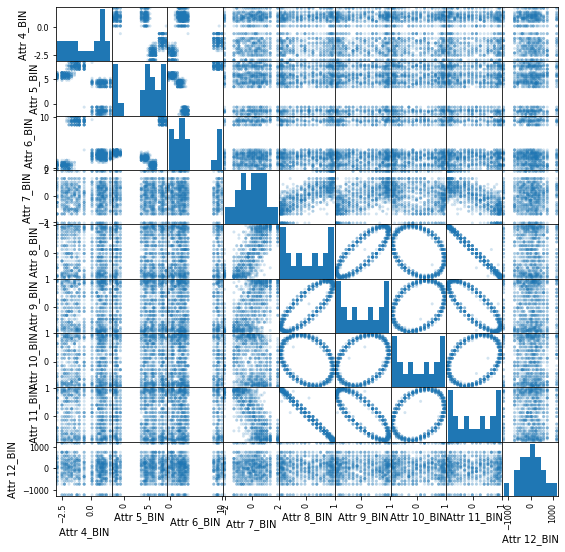

In [5]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sbn

df_Num=pd.read_csv("Quantitative.csv")
df_avg=pd.DataFrame()
attName='_BIN'

#function to calculate the values of averages in a bin
def print_average(name):
    df_sort=pd.DataFrame()
    a=[]
    df_sort["Column"]=df_Num[name].sort_values()
    for i in range(0,1000):
        a.append(i)
    df_sort["temp"+name]=df_sort.index.values
    df_sort.index=a 
    for i in range(0,len(df_Num),50):
        bin_data=list()
        for j in range(0,50):
            bin_data.append(df_sort.loc[i+j,"Column"])
        min_val=min(bin_data)
        max_val=max(bin_data)
        mean=(max_val+min_val)/2
        for k in range(i,i+50):
            df_sort.loc[k,name+attName]=mean
    df_sort.index=df_sort["temp"+name]
    df_s=df_sort.sort_index()
    df_sort.drop(columns=["Column",name+attName,"temp"+name])
    return df_s[name+attName]

for name,series in df_Num.iteritems():
    df_avg[name+attName] = print_average(name)
u = df_avg.max()
l = df_avg.min()
excel = pd.DataFrame()
excel['min'] = l
excel['max'] = u
#excel.to_excel('Binned.xlsx', sheet_name='Sheet2')
#SPLOM    
scatter_matrix(df_avg, alpha=0.2, figsize = (9,9), diagonal = 'hist')
#plt.savefig(r"SPLOM_BINNED.png")

#arrange the Attributes as required by the question
df_join = df_Num.join(df_avg)
columnames = []
for num,series in df_Num.iteritems():
    columnames.append(name)
    columnames.append(name+'_BIN')
df_binned=df_join[columnames]
print(df_binned)
#df_binned.to_csv('QuantitativeBinned.csv')
